In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
#this function is the numerator of the target distribution
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else: 
        return np.exp((x-1)/3) + np.exp((x-1)**3)

In [3]:
#normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

# Draw Target Distribution

In [4]:
NORM_CONST = 7.16556

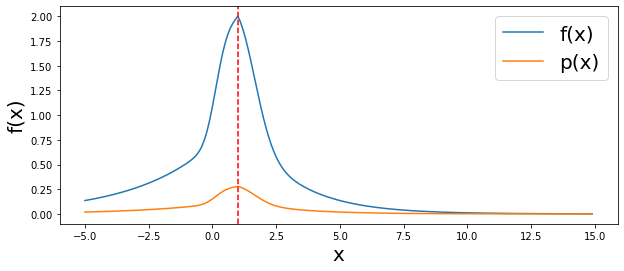

In [5]:
x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

In [6]:
TRUE_EXP = 1.94709 / NORM_CONST
print(TRUE_EXP)

0.2717289367474419


# Case 1 : Accept-Reject with N(0,3) Candidate

Text(0.5, 1.0, 'M=1')

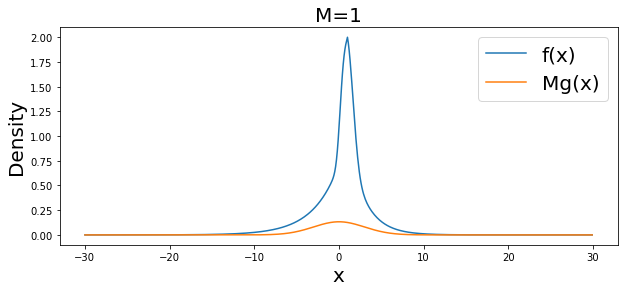

In [7]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3)
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=10')

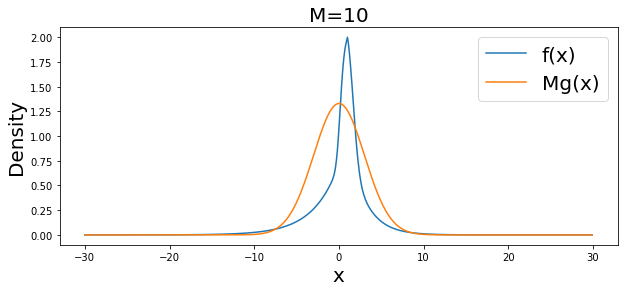

In [8]:
M = 10

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=1000')

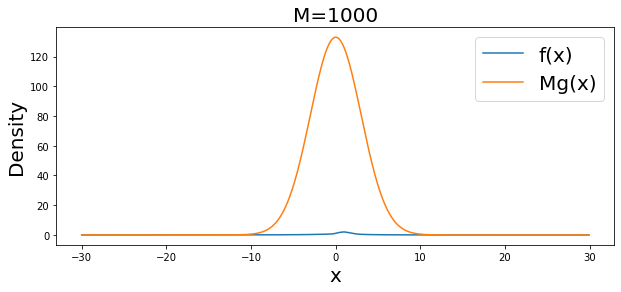

In [9]:
M = 1000

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

(0.0, 0.05)

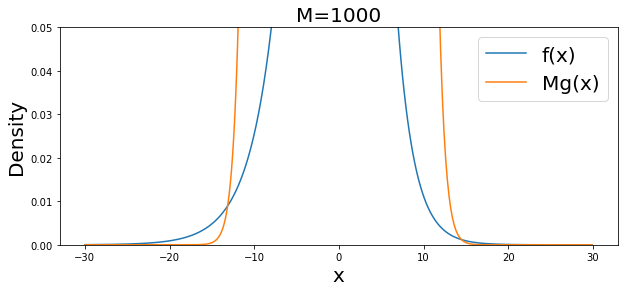

In [10]:
M = 1000

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

plt.ylim(0,.05)

In [11]:
#collect all accepted samples here
samples = []

#try this many candidates
N = 1000000

for _ in range(N):
    #sample a candidate
    candidate = np.random.normal(0, 3)
    
    #calculate probability of accepting this candidate
    prob_accept = f(candidate) / (M*g(candidate, 0, 3))
    
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [12]:
print("Num Samples Collected: %s"%len(samples))

Num Samples Collected: 6836


In [13]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.007


Text(0.5, 1.0, 'Empirical Exp. Value: 0.33\nTrue Exp. Value: 0.27')

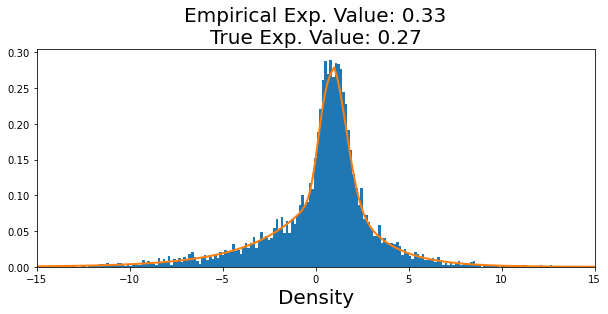

In [14]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=2)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)

# Case 2 : Accept-Reject with N(1,4) Candidate

Text(0.5, 1.0, 'M=1')

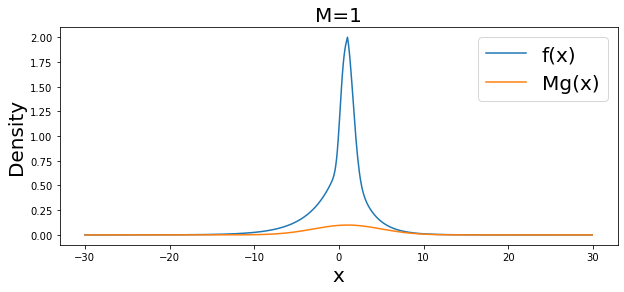

In [15]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1, 4)
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=75')

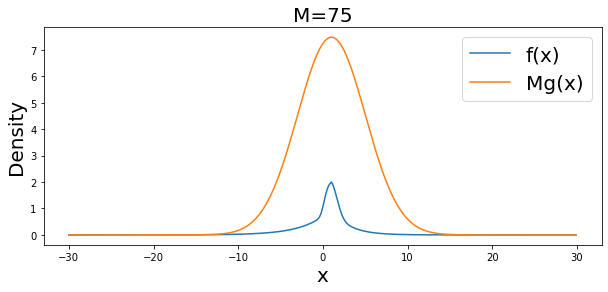

In [16]:
M = 75

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

(0.0, 0.05)

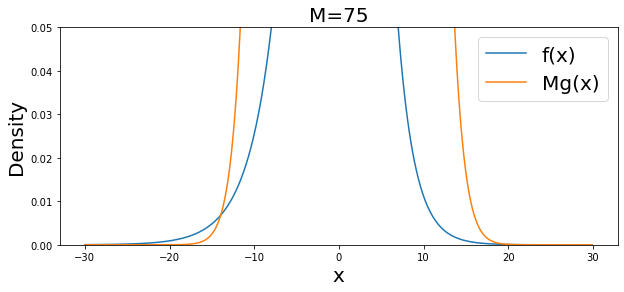

In [17]:
M = 75

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)
plt.ylim(0, 0.05)

In [18]:
samples = []
N = 1000000
for _ in range(N):
    #get a candidate from uniform distribution
    candidate = np.random.normal(1, 4)
    
    #calculate probabailty of accepting this sample
    prob_accept = f(candidate) / (M*g(candidate, 1, 4))
    
    #accept sample with this probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [19]:
print("Num Samples Collected: %s"%len(samples))

Num Samples Collected: 89884


In [20]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.09


Text(0.5, 1.0, 'Empirical Exp. Value: 0.32\nTrue Exp. Value: 0.27')

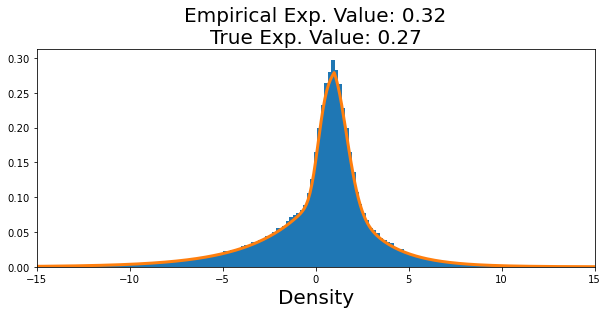

In [21]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=3)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)

Text(0.5, 1.0, 'Correlation: 0.0')

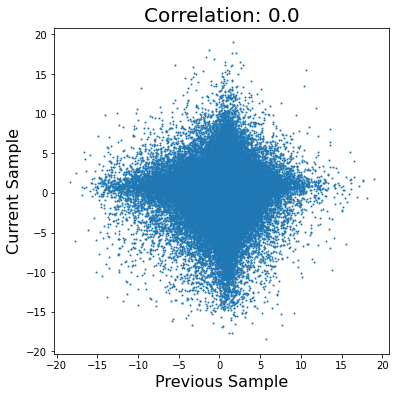

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

# Case 3 : Metropolis Algorithm with N($x_{prev}$, 4) Candidate

In [23]:
samples = [1]
num_accept = 0
for _ in range(N):
    #sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], 4)
    
    #calculate probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1]))
    
    #accept with the calculated probability
    if np.random.random() < prob:
        samples.append(candidate)
        num_accept += 1
        
    #otherwise report current sample again
    else:
        samples.append(samples[-1])

In [24]:
burn_in = 1000
retained_samples = samples[burn_in+1:]

In [25]:
print("Num Samples Collected: %s"%len(retained_samples))

Num Samples Collected: 999000


In [26]:
print("Efficiency: %s"%round(len(retained_samples) / N, 3))

Efficiency: 0.999


In [27]:
print("Fraction Acceptances: %s"%(num_accept / N))

Fraction Acceptances: 0.485362


Text(0.5, 1.0, 'Empirical Exp. Value: 0.28\nTrue Exp. Value: 0.27')

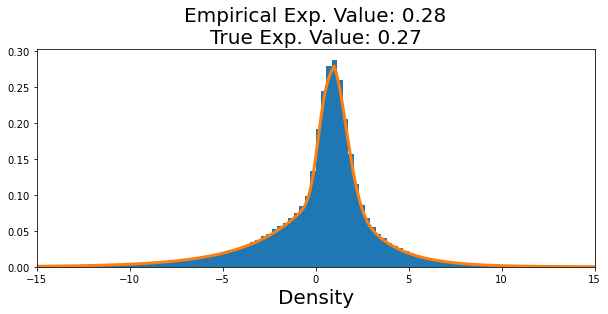

In [28]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=3)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)

Text(0.5, 1.0, 'Correlation: 0.81')

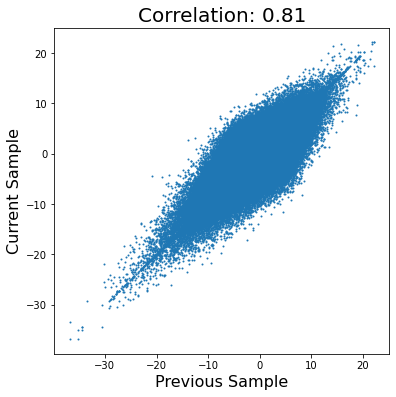

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)